In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
training_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')
training_data.head()
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
training_data.isnull().sum()
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
training_data.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
training_data.dropna()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [6]:
test_data.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
test_data.dropna()
print(test_data['gender'].value_counts())

gender
F    304886
M    250833
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(data):
    data['merchant']=le.fit_transform(data['merchant'])
    data["category"] = le.fit_transform(data["category"])
    data["gender"] = le.fit_transform(data["gender"])
    data["job"] = le.fit_transform(data["job"])
    return data

In [8]:
encode(training_data)
encode(test_data)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


<Axes: >

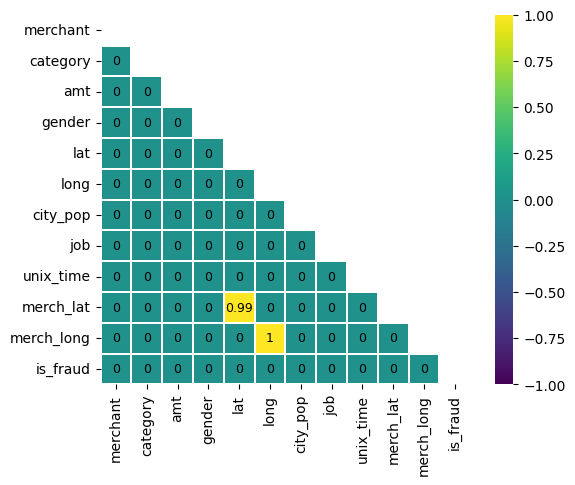

In [9]:
pd.options.display.float_format = "{:,.2f}".format
corr_matrix = training_data.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
cmap = "viridis"
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [10]:
X=training_data.drop(['is_fraud'],axis=1)
Y=training_data['is_fraud']

In [11]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [17]:
#logistic regression

from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))



0.9942211242586818


In [18]:
#decision tree  classification

from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.9958432197180999


In [19]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier(n_estimators=50, random_state=40,max_depth=10, n_jobs=1)
model_3.fit(x_train,y_train)
y_pred=model_3.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9966169926710077


In [16]:
x_TEST = test_data.drop(columns=["is_fraud"], inplace = False)
y_TEST = test_data["is_fraud"]

In [30]:
accuracy_score_list=[]

In [31]:
#prediction
y_pred=model_1.predict(x_TEST)
print(y_pred)
Lr_accuracy_score=accuracy_score(y_TEST,y_pred)
accuracy_score_list.append(Lr_accuracy_score)
print('Logistic regression test accuracy : ',Lr_accuracy_score)

[0 0 0 ... 0 0 0]
Logistic regression test accuracy :  0.9961401355721147


In [32]:
y_pred=model_2.predict(x_TEST)
print(y_pred)
Decision_accuracy_score=accuracy_score(y_TEST,y_pred)

accuracy_score_list.append(Decision_accuracy_score)
print('Decision Tree test accuracy : ',Decision_accuracy_score)

[0 0 0 ... 0 0 0]
Decision Tree test accuracy :  0.9921021235552501


In [33]:
y_pred=model_3.predict(x_TEST)
print(y_pred)
random_accuracy_score=accuracy_score(y_TEST,y_pred)
accuracy_score_list.append(random_accuracy_score)
print('Random Forest test accuracy : ',random_accuracy_score)


[0 0 0 ... 0 0 0]
Random Forest test accuracy :  0.9973493798124592


Text(0.5, 1.0, 'Accuracy score comparison')

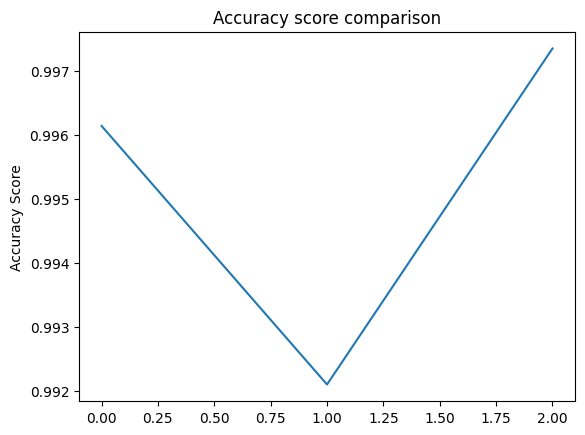

In [39]:
plt.plot(accuracy_score_list)
plt.ylabel('Accuracy Score')
plt.title('Accuracy score comparison')